In [64]:
import csv
import os

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
dataset = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/new_keypoint.csv'
model_save_path = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.keras'
tflite_save_path = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.tflite'
label_file_path = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/keypoint_classifier_label.csv'
# Function to check if a file exists
def check_file_path(file_path):
    if os.path.exists(file_path):
        if os.path.isfile(file_path):
            print(f"File exists: {file_path}")
        else:
            print(f"Path exists, but it's not a file: {file_path}")
    else:
        print(f"File does not exist: {file_path}")

# Check each file
check_file_path(dataset)
check_file_path(model_save_path)
check_file_path(tflite_save_path)
check_file_path(label_file_path)


File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/new_keypoint.csv
File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.keras
File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.tflite
File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/keypoint_classifier_label.csv


In [66]:
df = pd.read_csv(label_file_path, header=None)
num_classes= len(df)
num_classes

6

In [67]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype=np.float32, skiprows=1, usecols=list(range(1, (21*2)+1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype=np.int32, skiprows=1, usecols=(0))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.25, random_state=42)

In [69]:
print(X_train.shape)  
print(X_test.shape)   


(3931, 42)
(1311, 42)


In [70]:
# # Reshape the training and testing data
# X_train = X_train.reshape(-1, 21, 2)  # Reshape to (batch_size, 21, 2)
# X_test = X_test.reshape(-1, 21, 2)    # Reshape to (batch_size, 21, 2)
# print(X_train.shape)  # Should be (num_samples, 21, 2)
# print(X_test.shape)   # Should be (num_samples, 21, 2)



In [71]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21, 2)),  # Reshape to 21 timesteps, 2 features
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(20),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])


In [72]:
# model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_14 (Dropout)            │ (None, 21, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 20)             │         1,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116 (8.27 KB)

 Trainable params: 2,116 (8.27 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    # First LSTM layer
    tf.keras.layers.LSTM(256, input_shape=(42, 1), return_sequences=True, name='lstm_input'),
    tf.keras.layers.Dropout(0.2, name='dropout_1'),

    # Second LSTM layer
    tf.keras.layers.LSTM(128, return_sequences=True, name='lstm_1'),
    tf.keras.layers.Dropout(0.2, name='dropout_2'),

    # Third LSTM layer
    tf.keras.layers.LSTM(64, return_sequences=True, name='lstm_2'),
    tf.keras.layers.Dropout(0.2, name='dropout_3'),

    # Fourth LSTM layer
    tf.keras.layers.LSTM(16, return_sequences=False, name='lstm_3'),  # Final LSTM layer
    tf.keras.layers.Dropout(0.2, name='dropout_4'),

    # Dense layer for classification
    tf.keras.layers.Dense(num_classes, activation='softmax', name='dense_1')  
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_input (LSTM)               │ (None, 42, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 42, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 42, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 42, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 42, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 516,006 (1.97 MB)

 Trainable params: 516,006 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [75]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [76]:
hist = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, early_stopping]
)

Epoch 1/1000


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.2010 - loss: 1.7666
Epoch 1: saving model to C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.2021 - loss: 1.7656 - val_accuracy: 0.2715 - val_loss: 1.6403
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.3099 - loss: 1.6157
Epoch 2: saving model to C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.3109 - loss: 1.6140 - val_accuracy: 0.4493 - val_loss: 1.4233
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4107 - loss: 1.4043
Epoch 3: saving model to C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_lstm.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.4116 - loss: 1.4029 - val_accuracy: 0.5256 - val_loss: 1.1607
Epoch 4/1000
31/31 

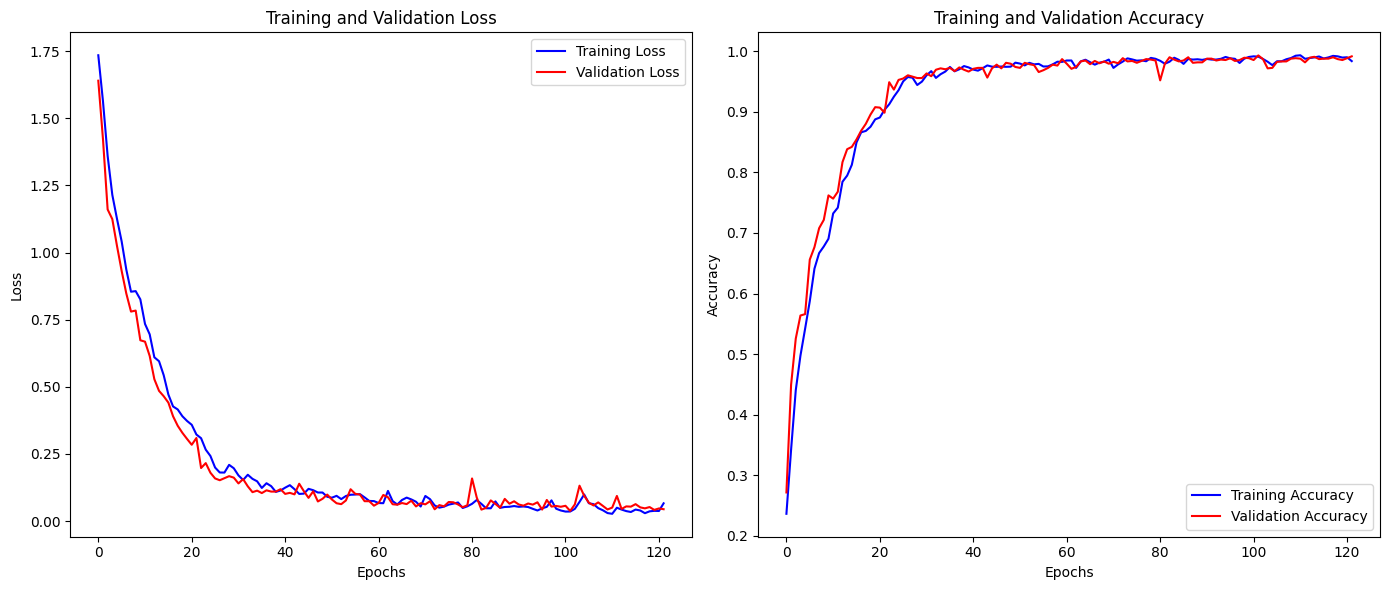

In [78]:
# Extract accuracy and loss data from the training history
history_dict = hist.history

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the training and validation loss
ax[0].plot(history_dict['loss'], label='Training Loss', color='blue')
ax[0].plot(history_dict['val_loss'], label='Validation Loss', color='red')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
ax[1].plot(history_dict['val_accuracy'], label='Validation Accuracy', color='red')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [79]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9934 - loss: 0.0359


In [80]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [81]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
[1.6364815e-05 1.9843537e-04 5.3036492e-04 9.9862027e-01 5.6093320e-04
 7.3620635e-05]
3


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


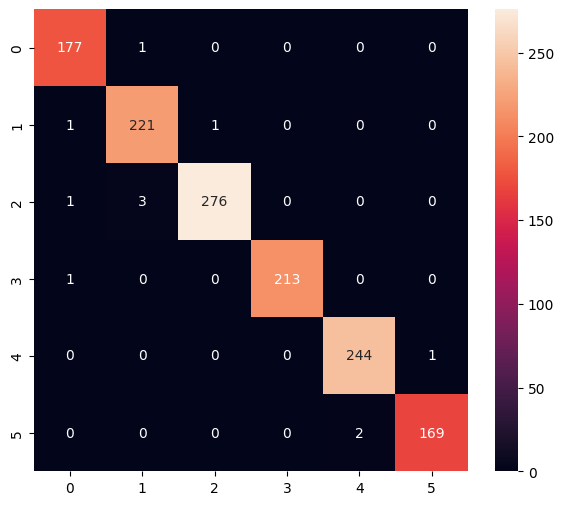

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.98      0.99      0.99       223
           2       1.00      0.99      0.99       280
           3       1.00      1.00      1.00       214
           4       0.99      1.00      0.99       245
           5       0.99      0.99      0.99       171

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [82]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [83]:
model.save(model_save_path, include_optimizer=False)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_input (LSTM)               │ (None, 42, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 42, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 42, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 42, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 42, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,548,020 (5.91 MB)

 Trainable params: 516,006 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,032,014 (3.94 MB)

In [91]:
# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enable resource variables and TensorFlow ops
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # TensorFlow Lite built-in ops
    tf.lite.OpsSet.SELECT_TF_OPS     # TensorFlow operations
]

# Convert the model
tflite_quantized_model = converter.convert()

# Save the converted model to a file
# tflite_save_path = "model_quantized.tflite"
with open(tflite_save_path, "wb") as f:
    f.write(tflite_quantized_model)

print(f"TFLite model saved to: {tflite_save_path}")


INFO:tensorflow:Assets written to: C:\Users\dangq\AppData\Local\Temp\tmplk9buqk2\assets


INFO:tensorflow:Assets written to: C:\Users\dangq\AppData\Local\Temp\tmplk9buqk2\assets


Saved artifact at 'C:\Users\dangq\AppData\Local\Temp\tmplk9buqk2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42, 1), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1944610798080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611066048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611068864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611077664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611195184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611195536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611204336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611206272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611205920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1944611329072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  194461133

In [86]:
# Transform model (quantization)

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# open(tflite_save_path, 'wb').write(tflite_quantized_model)

In [87]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [88]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [89]:
print('Input details: \n',input_details)
print('\n')
print('Onput details: \n',output_details)

Input details: 
 [{'name': 'serving_default_input_layer_10:0', 'index': 0, 'shape': array([ 1, 42,  1]), 'shape_signature': array([-1, 42,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Onput details: 
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 75, 'shape': array([1, 6]), 'shape_signature': array([-1,  6]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
